In [41]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


In [42]:
# Load Dataset
df = pd.read_csv( "C:\\Users\\ajila\\Downloads\\ML Project\\Dataset\\Mall_Customers.csv" )

In [43]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
df.drop(["CustomerID"], axis=1, inplace=True)

In [45]:
# Data Analysis below 5 -head,shape,describe,dtypes, is null

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [46]:
df.shape

(200, 4)

In [47]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [48]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [49]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [50]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\ajila\AppData\Local\Temp\ipykernel_20780\3142521773.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
C:\Users\ajila\AppData\Local\Temp\ipykernel_20780\3142521773.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
C:\Users\ajila\AppData\Local\Temp\ipyk

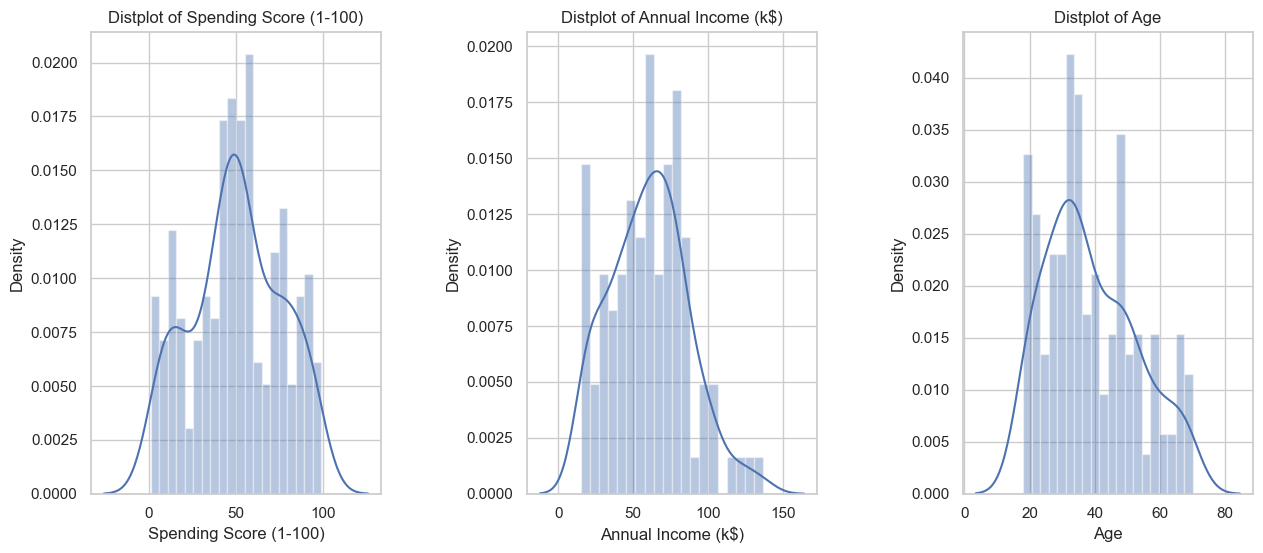

In [51]:
# Exploratory data analysis - Distribution plot of Age, Annual Income and Spending Score

plt.figure(1, figsize=(15,6))
n=0
for x in {'Age', 'Annual Income (k$)' ,'Spending Score (1-100)' }:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [52]:
#Scale the features
# Before app;ying K Means clustering, we need to transform the Data set(just make sure mean = 0 and standard deviation =1). 

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the data using the fit_transform method
X_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

C:\Users\ajila\AppData\Local\Temp\ipykernel_20780\2062631013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Gender', data=df, palette={'Male': 'blue', 'Female': 'yellow'})


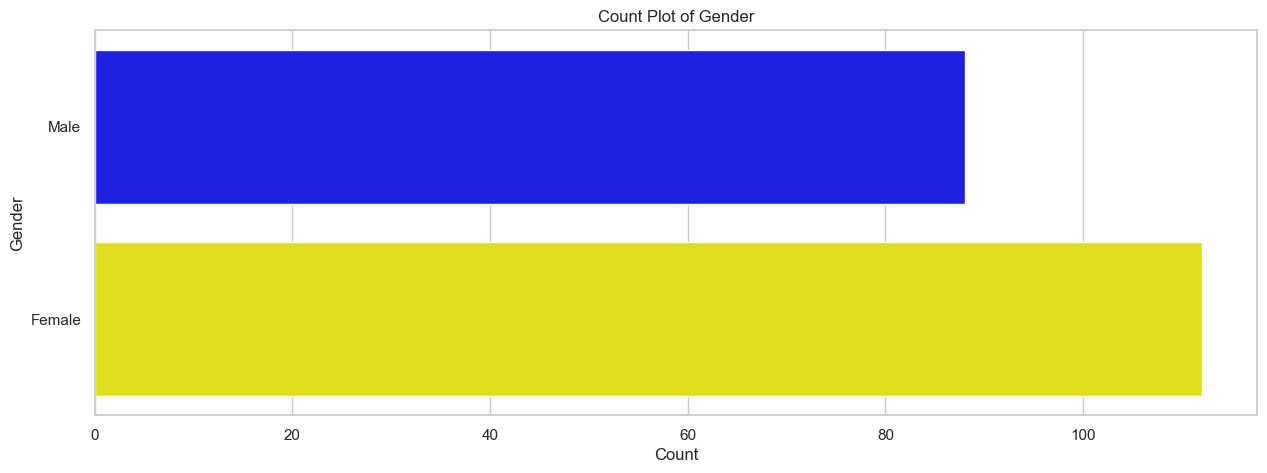

In [53]:

# Count plot of gender

plt.figure(figsize=(15, 5))
sns.countplot(y='Gender', data=df, palette={'Male': 'blue', 'Female': 'yellow'})
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Count Plot of Gender')
plt.show()

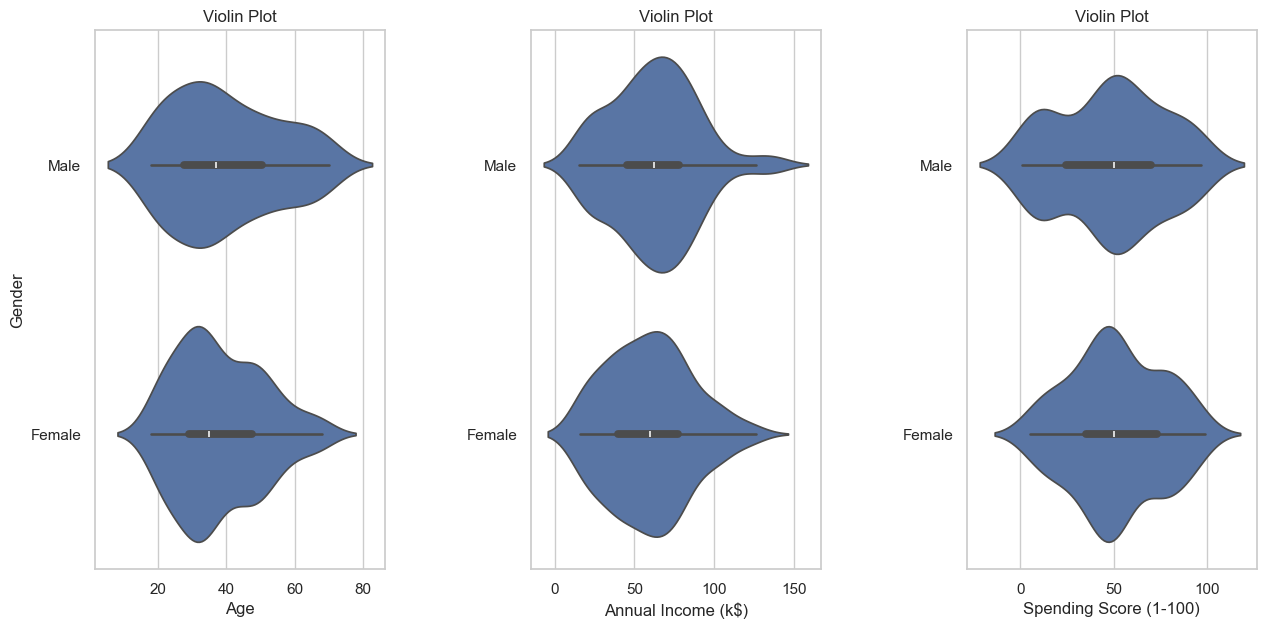

In [54]:
# Violin plot of features by gender

plt.figure(figsize=(15, 7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace=.5)
    sns.violinplot(x=cols, y='Gender', data=df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')

# Show the plot after the loop to display all subplots together
plt.show()






C:\Users\ajila\AppData\Local\Temp\ipykernel_20780\2101833760.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex, y=agey, palette="mako")


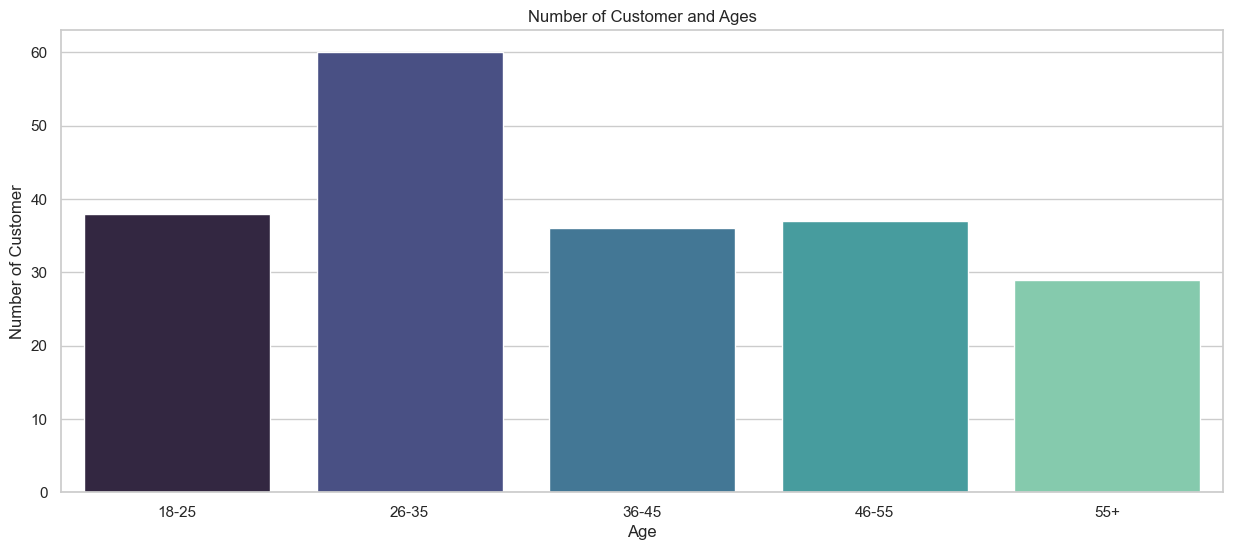

In [55]:
# Age Distribution

age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age [(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]

agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

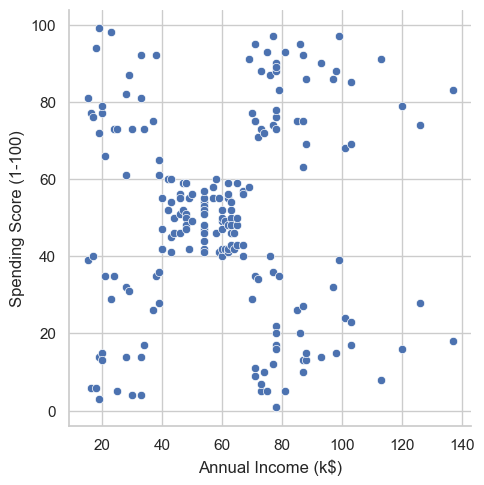

In [56]:
#Relationship plot of income and spending score
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

C:\Users\ajila\AppData\Local\Temp\ipykernel_20780\4083902721.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette="rocket")


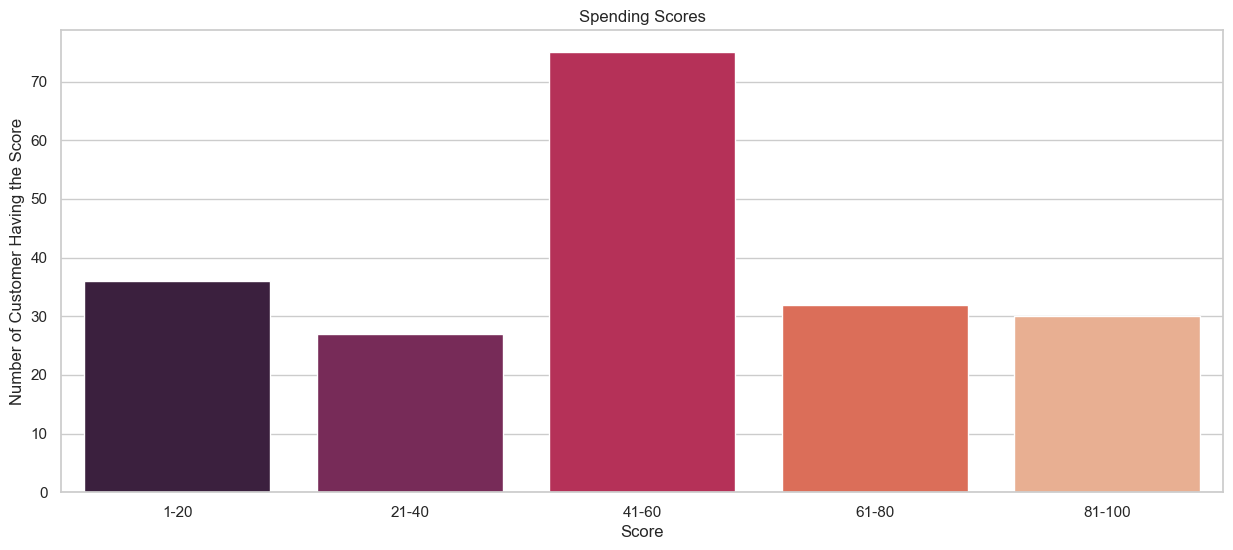

In [57]:
#Spending score distribution

ss_1_20   = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40  = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60  = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80  = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

C:\Users\ajila\AppData\Local\Temp\ipykernel_20780\1156396313.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix, y=aiy, palette="Spectral")


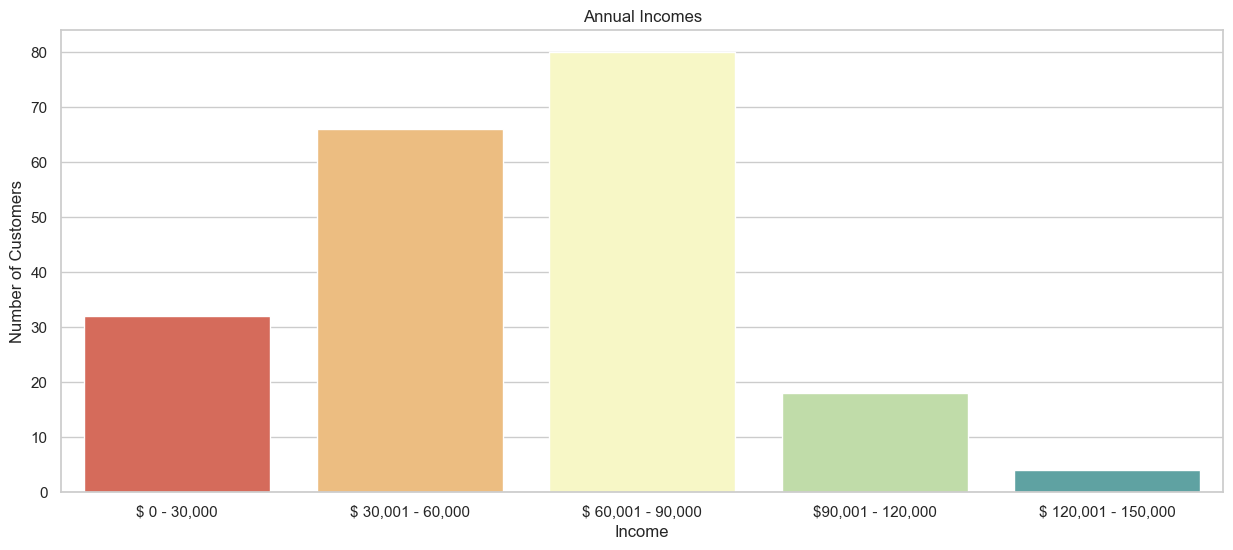

In [58]:
#  Annual Income Distribution

ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60=df["Annual Income (k$)"] [(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90=df["Annual Income (k$)"] [(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()


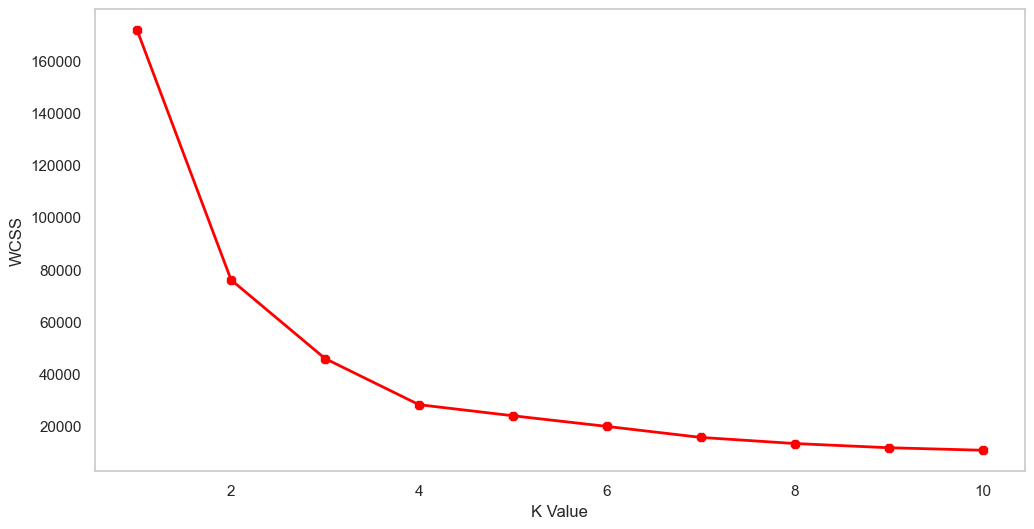

In [59]:
# K Means clustering on Age and Spending Score


X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


In [60]:
#Predicts the cluster labels for each data point in X1, assigning each point 
# to the nearest cluster. The resulting label array contains the cluster indices (0 through 3) for each data point.


kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)



[1 0 3 0 1 0 3 0 3 0 3 0 3 0 3 0 1 1 3 0 1 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3
 0 3 0 2 0 2 1 3 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 0 1 0 2 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 2 0
 3 0 3 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [61]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


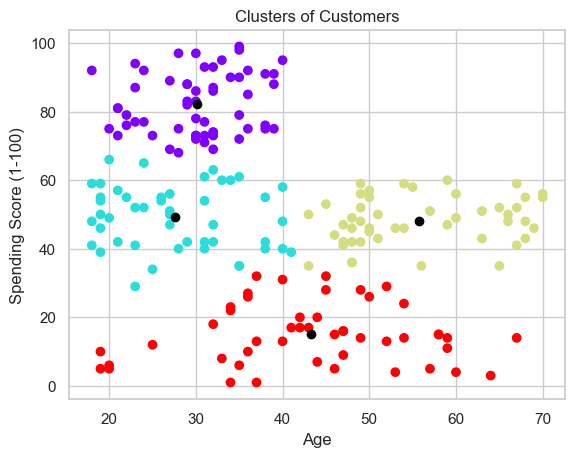

In [62]:

#Scatter plot on Age and Spending Score

plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


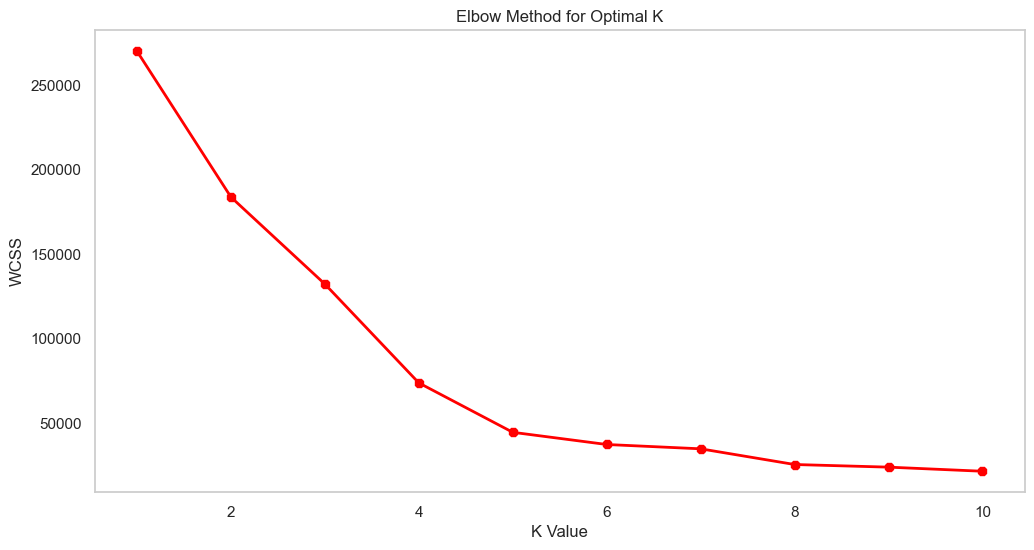

In [63]:

#K Means clustering on Income and spending score

X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [64]:
# Cluster Assignment 

# Here we are initializing K Means Clustering Model and the parameter(n_clusters=5) specifies that algorithm should find 4 clusters in the data.


kmeans = KMeans (n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [65]:
#Printing the Centriod of each clusters
print (kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


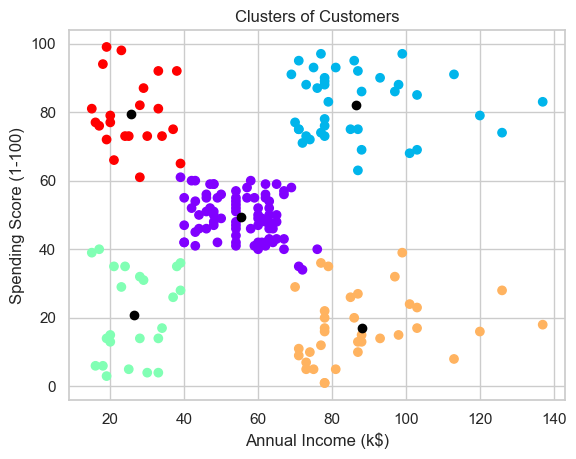

In [66]:
#Scatter plot for Annual income and spending score

plt.scatter(X2[:, 0], X2[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


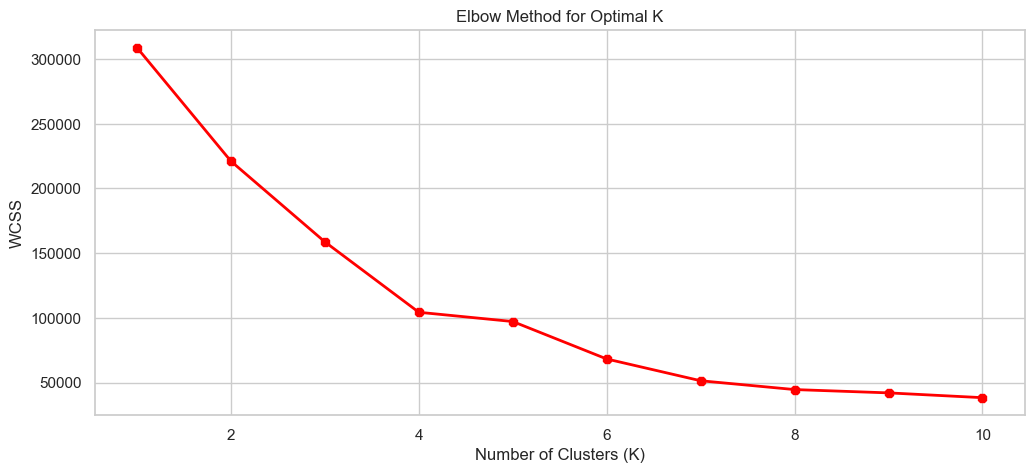

In [67]:
# KMeans clustering on Age, Annual icome and spending score (3D Representation)

X3 = df.iloc[:, 1:]
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))
plt.grid(True)
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [68]:
#K Means cluster assignmnet

kmeans = KMeans (n_clusters = 4)
label = kmeans .fit_predict(X3)
print(label)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [69]:
# Mean value of each features(Age,Annual Income and Spending score) against each cluster group is represted as table.

df['cluster'] = label

# analyze the characteristics of each customer segment
segment_summary = df.groupby('cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',

}).rename(columns={
    'Age': 'Mean Age',
    'Annual Income (k$)': 'Mean Annual Income (k$)',
    'Spending Score (1-100)': 'Mean Spending Score (1-100)',

})
print(segment_summary)

          Mean Age  Mean Annual Income (k$)  Mean Spending Score (1-100)
cluster                                                                 
0        40.394737                87.000000                    18.631579
1        39.200000                48.260000                    56.480000
2        32.692308                86.538462                    82.128205
3        45.217391                26.304348                    20.913043


In [70]:
print(kmeans.cluster_centers_)

[[40.39473684 87.         18.63157895]
 [39.2        48.26       56.48      ]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]]


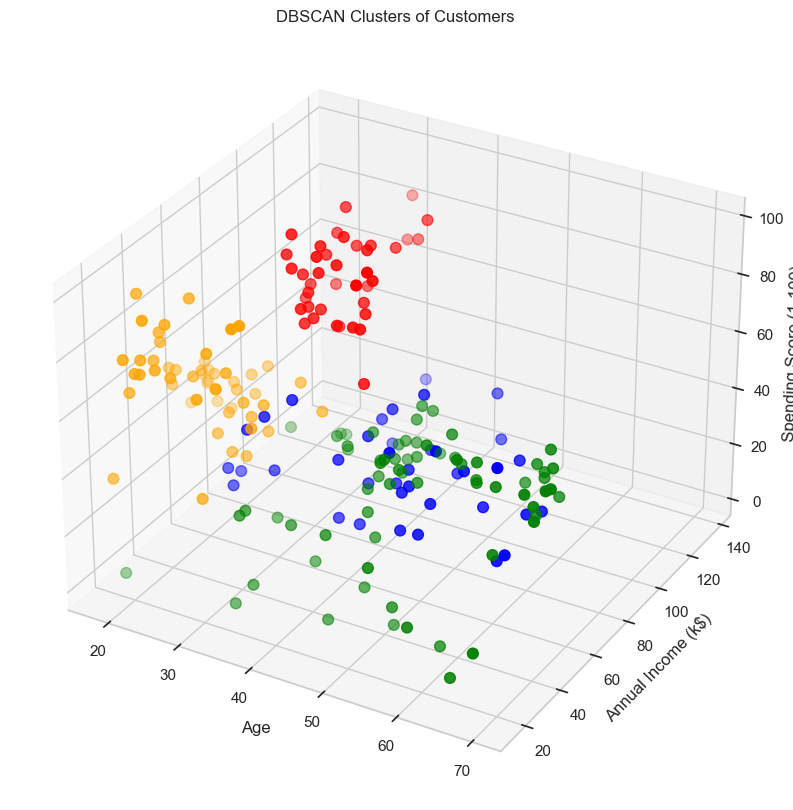

In [71]:
# 3D plot for visualization - K-Means

clusters = kmeans.fit_predict(X3)
df["label"] = clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age [df.label == 0], df ["Annual Income (k$)"] [df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s= 60)
ax.scatter(df.Age [df.label == 1], df ["Annual Income (k$)"] [df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s= 60)
ax.scatter(df.Age [df.label == 2], df ["Annual Income (k$)"] [df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s= 60)
ax.scatter(df.Age [df.label == 3], df ["Annual Income (k$)"] [df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s= 60)
ax.scatter(df.Age [df.label == 4], df ["Annual Income (k$)"] [df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s= 60)


plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('DBSCAN Clusters of Customers')
plt.show()






In [72]:
# Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(X_scaled)
df['AgglomerativeCluster'] = agg_labels


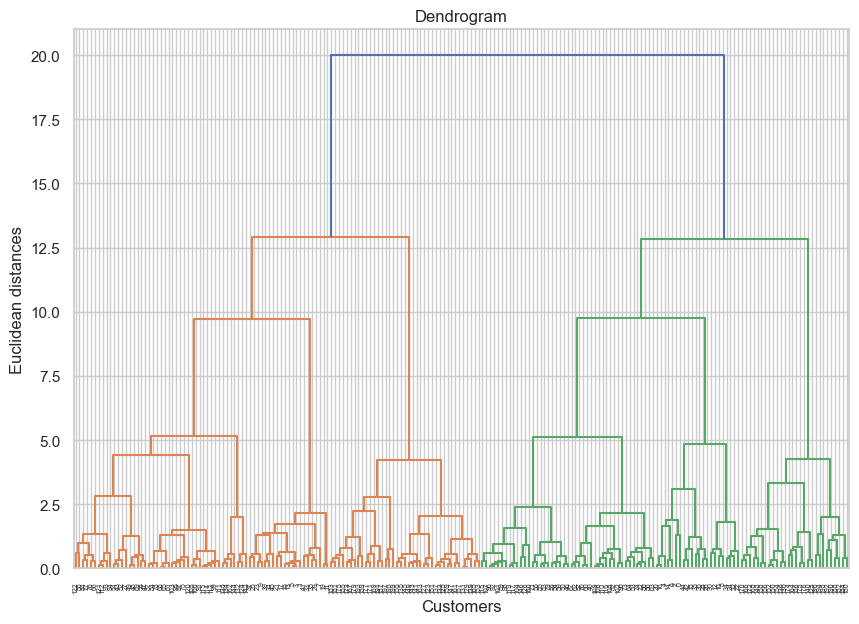

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Dendrogram for Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

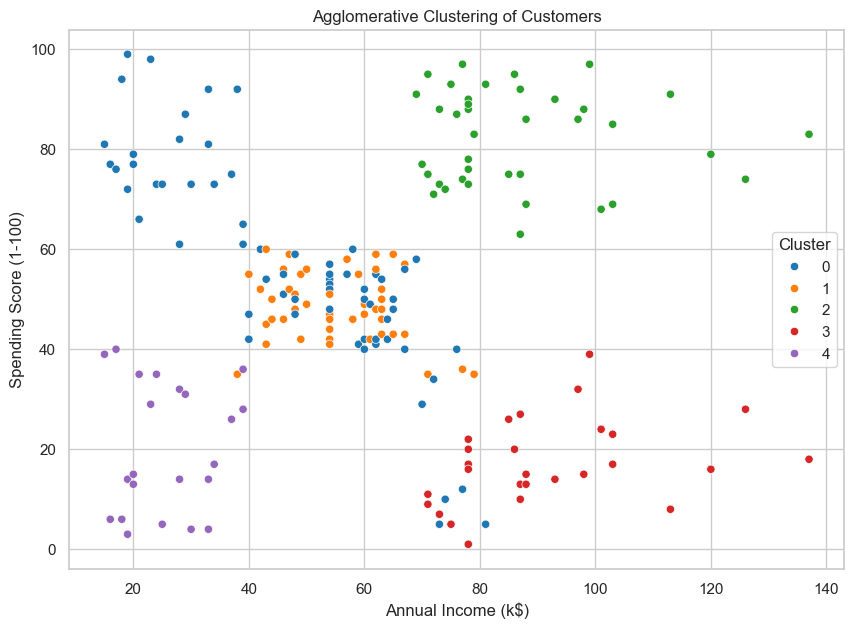

In [74]:
# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='AgglomerativeCluster', data=df, palette='tab10')
plt.title('Agglomerative Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

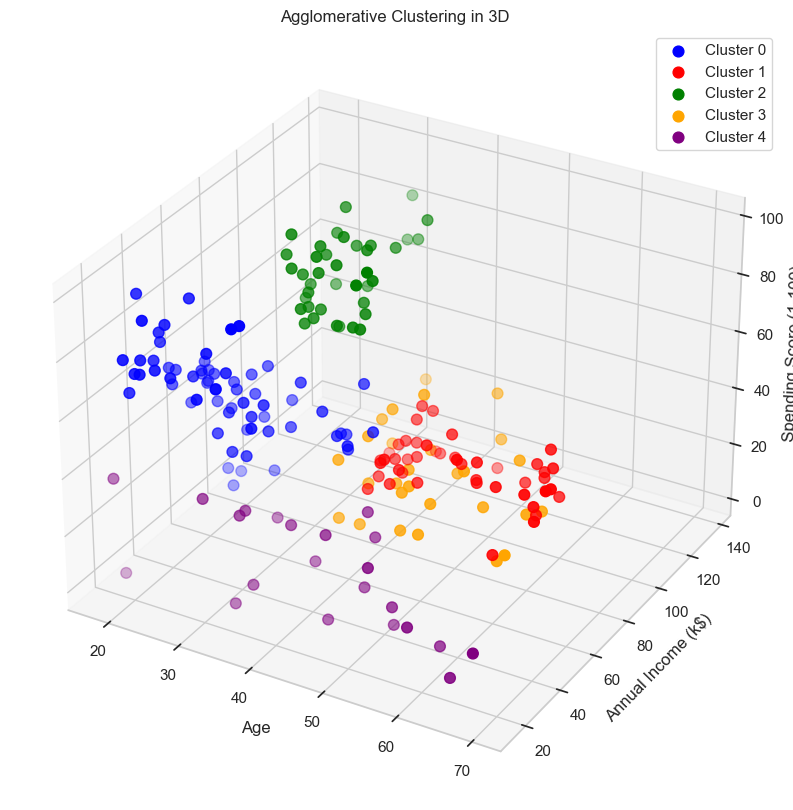

In [75]:
# 3D plot for visualization -Agglomerative

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i in range(5):
    ax.scatter(df.Age[df.AgglomerativeCluster == i],
               df["Annual Income (k$)"][df.AgglomerativeCluster == i],
               df["Spending Score (1-100)"][df.AgglomerativeCluster == i],
               c=colors[i], s=60, label=f'Cluster {i}')

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering in 3D')
plt.legend()
plt.show()

In [76]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
df['dbscan_cluster'] = dbscan.labels_

In [77]:
# Analyze the characteristics of each customer segment
segment_summary_dbscan = df.groupby('dbscan_cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
}).rename(columns={
    'Age': 'Mean Age',
    'Annual Income (k$)': 'Mean Annual Income (k$)',
    'Spending Score (1-100)': 'Mean Spending Score (1-100)',
})


In [78]:
# Display the segment summary
print(segment_summary_dbscan)

                 Mean Age  Mean Annual Income (k$)  \
dbscan_cluster                                       
-1              40.133333                68.533333   
 0              23.764706                25.823529   
 1              38.200000                27.800000   
 2              53.666667                54.156863   
 3              24.107143                54.321429   
 4              32.750000                80.875000   
 5              43.857143                78.714286   

                Mean Spending Score (1-100)  
dbscan_cluster                               
-1                                31.533333  
 0                                78.176471  
 1                                31.800000  
 2                                48.411765  
 3                                50.464286  
 4                                83.625000  
 5                                14.571429  


C:\Users\ajila\AppData\Local\Temp\ipykernel_20780\3959114345.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df.Age[df.dbscan_cluster == cluster],


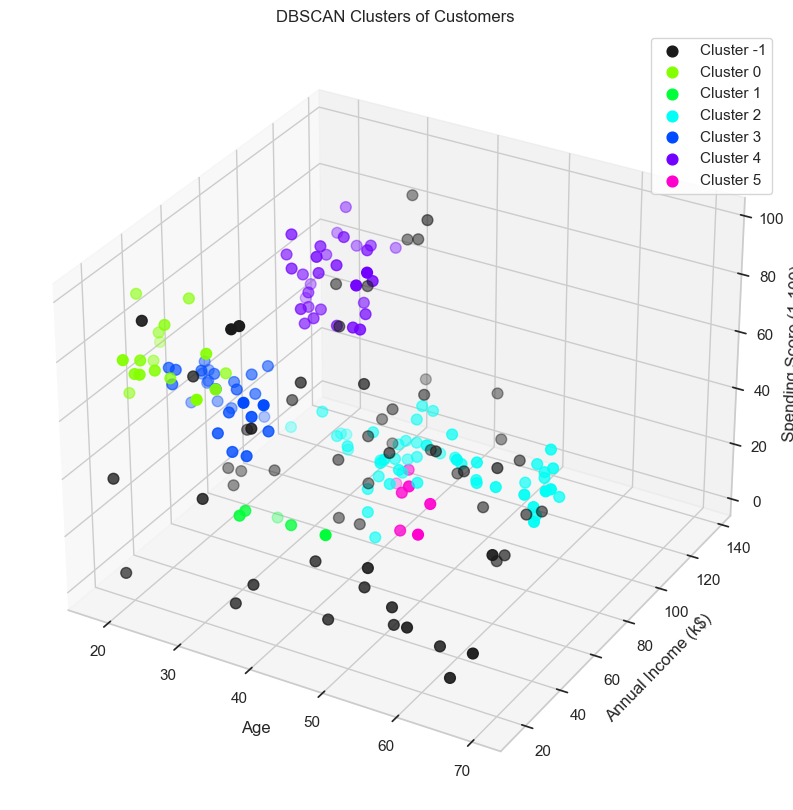

In [79]:
# 3D plot for visualization -DBSCAN

clusters_dbscan = df['dbscan_cluster'].unique()
colors = sns.color_palette('hsv', len(clusters_dbscan))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster, color in zip(clusters_dbscan, colors):
    if cluster == -1:
        color = 'k'  # Noise points
    ax.scatter(df.Age[df.dbscan_cluster == cluster],
               df["Annual Income (k$)"][df.dbscan_cluster == cluster],
               df["Spending Score (1-100)"][df.dbscan_cluster == cluster],
               c=color, s=60, label=f'Cluster {cluster}')

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.title('DBSCAN Clusters of Customers')
plt.show()


In [80]:
# DBSCAN clustering
X3 = df.iloc[:, 1:]
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X3)

DBSCAN()